# **2 - Visualization: Spatial Clustering**

In [1]:
from pathlib import Path
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import pandas as pd

## Read Data

In [2]:
# Change path so that it points to  were data is located
pth = Path(r'../data')
pth 

WindowsPath('../data')

### Read Geographic information 

##### Read rasters

In [3]:
fn = pth / 'geography' / 'multi_hillshade.tif'
hs = rio.open(fn)
fn

WindowsPath('../data/geography/multi_hillshade.tif')

##### Read surveyed fields

In [4]:
fn = pth / 'fields' / 'fields14_18.shp'
fields = gpd.read_file(fn, encoding ='utf-8')
fields.tail(2)

,MASA,PARCELA,SUBPARCE,TIPO,AREA,REFCAT,TIPOSUBP,CC,DENOMINA,REGADIO,...,Yr2014,Yr2015,2014status,2015status,Yr2016,2016status,Visited,Status,area_ha,geometry
327,016,00125,0,R,11113,07062A01600125,T,AM,Almendro secano,None,...,0,0,None,None,1,Done,None,None,1.11,"POLYGON Z ((530726.213 4388450.906 0.000, 5307..."
328,010,00144,0,R,14717,07062A01000144,T,C-,Labor o Labradío secano,None,...,0,0,None,None,0,None,None,None,1.47,"POLYGON Z ((529948.730 4387913.155 0.000, 5298..."


##### Read Torrents

In [5]:
fn = pth / 'geography' / 'torrentes.shp'
torrents = gpd.read_file(fn, encoding ='utf-8')
torrents.tail(2)

,OBJECTID,gid,fecha,version,id_curso,id_nom_geo,nombre,id_enlace,id_demarc,drainsbasi,...,ancho_min,marea,delineatio,longitud,resolucion,fuente,origen_z,inspireid_,Shape_Leng,geometry
7,8,3460084,2019-04-28,0,207536,0,Torrent de Xiclatí,0,ES110,None,...,1,0,1,7572.69,5,5001,4002,ES110HYWCSL0000003460084,664.030925,"LINESTRING Z (529649.501 4389234.994 98.600, 5..."
8,9,3458188,2019-04-28,0,207546,0,None,0,ES110,None,...,1,0,1,7274.03,5,5001,4002,ES110HYWCSL0000003458188,1212.757403,"LINESTRING Z (528702.500 4386258.404 135.429, ..."


##### Read Archaeological Sites

In [6]:
fn = pth / 'sites' / 'sites.xlsx'
sites_tmp = pd.read_excel(fn)

In [7]:
from shapely.geometry import Point
sites = sites_tmp.copy()
sites['geometry'] = sites.apply(lambda pt: Point(pt.easting, pt.northing), axis = 1)
sites = gpd.GeoDataFrame(sites)

##### Read Clustered Survey Points

In [8]:
fn = pth / 'clustered' / 'spatial'/ 'cluster_pts.txt'
survey_pts = pd.read_csv(fn, encoding ='utf-8')
survey_pts.head(2)

,SurveyPointId,Easting,Northing,AtBlckGlz,Balearic,CamBlckGlzA,CamBlckGlzB,CmedPuAm,EbBlckGlz,EbPuAm,...,IbAm,IbCom,ItAm,ItCom,MasAm,PuAm,PuCom,SoItVesCaAm,Biclst,dbscan
0,02001d-77-012,531989.73,4385614.15,0.0,0.0,0.0,0.0,0.0,0.0,38.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1
1,02001d-80-008,531872.15,4385569.72,0.0,0.0,0.0,0.0,0.0,0.0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1


##### Generate geopandas from clustered Survey Points

In [9]:
from shapely.geometry import Point

survey_pts['geometry'] = survey_pts.apply(lambda pt: Point(pt.Easting, pt.Northing), axis = 1)
survey_pts = gpd.GeoDataFrame(survey_pts)
survey_pts.head(2)

,SurveyPointId,Easting,Northing,AtBlckGlz,Balearic,CamBlckGlzA,CamBlckGlzB,CmedPuAm,EbBlckGlz,EbPuAm,...,IbCom,ItAm,ItCom,MasAm,PuAm,PuCom,SoItVesCaAm,Biclst,dbscan,geometry
0,02001d-77-012,531989.73,4385614.15,0.0,0.0,0.0,0.0,0.0,0.0,38.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,POINT (531989.730 4385614.150)
1,02001d-80-008,531872.15,4385569.72,0.0,0.0,0.0,0.0,0.0,0.0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,POINT (531872.150 4385569.720)


# Plots

## Spatial Clusters

##### Generate distinct markers

In [10]:
mrkrs = ['s', 'p', 'h', 'o']
n = survey_pts.dbscan.nunique()
markers = [np.take(mrkrs, i, mode= 'wrap') for i in range(n)]
markers[0] = 'x'

##### Generate Color palette

In [11]:
color = sns.color_palette('colorblind', n_colors= n)
color = [list(c) for c in color]
lbls = survey_pts.dbscan.unique()

### Plot map

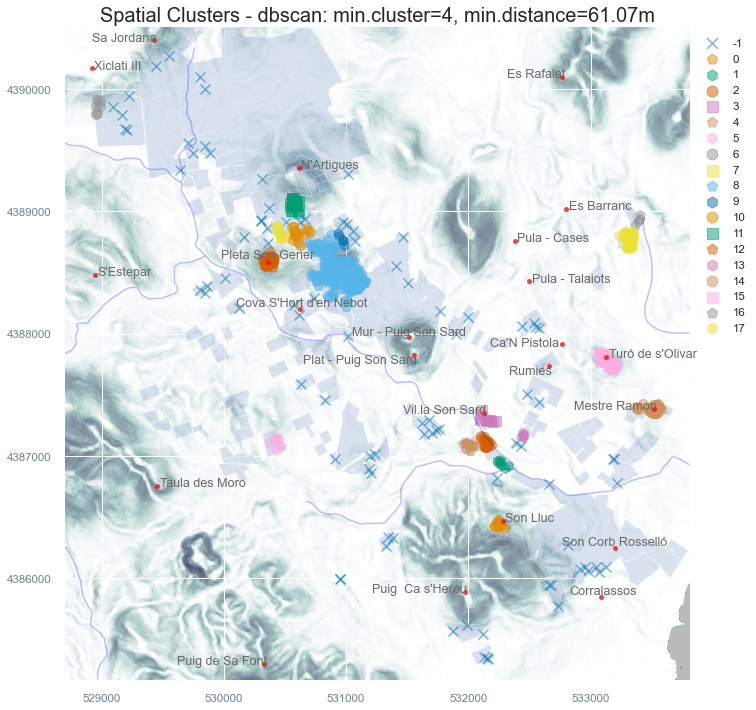

In [12]:
from leiap_survey.utils import plot_raster

mpl.style.use('seaborn')
sns.set(font_scale = 1.05)

# set up annotation data
data_lbls = zip(sites.name, sites.easting, sites.northing, sites.offx, sites.offy, sites.ha, sites.va )

# define figure and size
fig, ax = plt.subplots(figsize= (12, 12))

# background terrain
plot_raster(hs, colors="bone", ax= ax, nodata_color={'color': 'k', 'alpha': 0.30}, title= 'Spatial Clusters - dbscan: min.cluster=4, min.distance=61.07m')
torrents.plot(ax=ax, edgecolor='blue', alpha= 0.25)
fields.plot(ax= ax, edgecolor= 'white', alpha= 0.2)

# loop through markers
for i, m in enumerate(markers):
    survey_pts.query('dbscan == @lbls[@i]').plot(ax=ax, markersize=100, marker=m, color= color[i], alpha= 0.5, label=lbls[i])

# loop through annotations
for text, x, y, offx, offy, ha, va in data_lbls:
    ax.annotate(text, xy=(x,y), xytext= (offx, offy), ha=ha, va=va, color='dimgray', textcoords='offset points')

# plot archaeological sites
sites.plot(ax=ax, markersize= 15, color='red', alpha=0.7)

# adjust legend
leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon= False, markerscale= 1.1)

# Uncomment to save figure
#plt.savefig(pth /'output'/ 'Spatial_SurveyPts_clustered.png' dpi= 300)

plt.show()


### Display Cluster content

In [13]:
from leiap_survey.cluster import cluster_profile

#### Generate Production to Type Mapping
Used to map original ceramic productions into ceramic types

In [14]:
type_map = {
 'AtBlckGlz': 'Fineware',
 'Balearic': 'Coarseware',
 'CamBlckGlzA': 'Fineware',
 'CamBlckGlzB': 'Fineware',
 'CmedPuAm':  'Amphora',
 'EbBlckGlz': 'Fineware',
 'EbPuAm':  'Amphora',
 'EbPuCom': 'Commonware',
 'GrItAm':  'Amphora',
 'IbAm':  'Amphora',
 'IbCom': 'Commonware',
 'ItAm':  'Amphora',
 'ItCom': 'Commonware',
 'MasAm': 'Amphora',
 'PuAm': 'Amphora',
 'PuCom':'Commonware',
 'SoItVesCaAm': 'Amphora'
}

Extract **only** data from dataframe

In [15]:
data = survey_pts.iloc[:,3:20]
data.columns

Index(['AtBlckGlz', 'Balearic', 'CamBlckGlzA', 'CamBlckGlzB', 'CmedPuAm',
       'EbBlckGlz', 'EbPuAm', 'EbPuCom', 'GrItAm', 'IbAm', 'IbCom', 'ItAm',
       'ItCom', 'MasAm', 'PuAm', 'PuCom', 'SoItVesCaAm'],
      dtype='object')

Select the cluster for which you want to display the content

In [16]:
from leiap_survey.cluster import cluster_profile
cluster = 0
sel = survey_pts['dbscan']== cluster

Display ceramic types

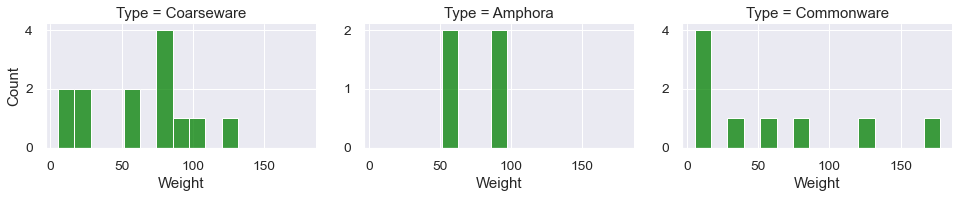

In [17]:
sns.set(font_scale = 1.25)
lbls= ['Type', 'Weight']
ax = cluster_profile(data, sel.values, lbls, opt='map', map_dict=type_map)

# Uncomment to save
fn = pth /'output'/ 'cluster_0_pts_types.png'
#plt.savefig(fn, dpi=300)


Display content by original ceramic production

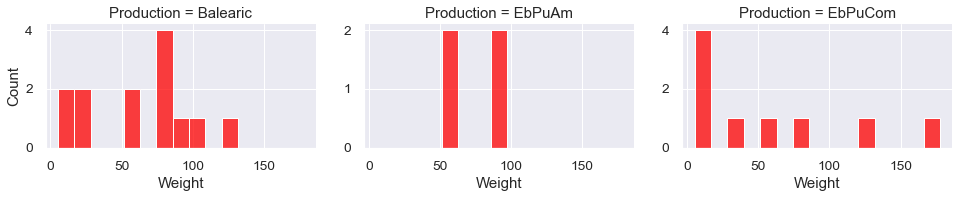

In [18]:
sns.set(font_scale = 1.25)
lbls= ['Production', 'Weight']
ax = cluster_profile(data, sel.values, lbls, opt='raw')

# Uncomment to save
fn = pth /'output'/ 'cluster_0_pts_productions.png'
#plt.savefig(fn, dpi=300)